# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## XRP 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_xrp_train_data = pd.read_csv('vader_textblob_xrp_train_data').drop('Unnamed: 0',axis=1)
flair_xrp_train_data = pd.read_csv('flair_xrp_train_data.csv').drop('Unnamed: 0',axis=1)
xrp_train_data = pd.read_csv('xrp_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_xrp_test_data = pd.read_csv('vader_textblob_xrp_test_data').drop('Unnamed: 0',axis=1)
flair_xrp_test_data = pd.read_csv('flair_xrp_test_data.csv').drop('Unnamed: 0',axis=1)
xrp_test_data = pd.read_csv('xrp_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(xrp_train_data,xrp_test_data)

In [6]:
coin =  gfmodel.coin_data_load('xrp')

  0%|          | 0/3210 [00:00<?, ?it/s]

In [8]:
gfmodel.convert_train_data(vader_textblob_xrp_train_data,flair_xrp_train_data)
gfmodel.convert_test_data(vader_textblob_xrp_test_data,flair_xrp_test_data)

(13728, 11)
(13728, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/13728 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/38819 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,61075,65.2047,0.108494,57.900628,0.096340,-63.534654,-0.105715,825584,1373.683860,...,0.6444,1.546067e+09,3.099725e+10,2022-04-29,0.6443,0.6456,0.6039,0.6114,1.962198e+09,2.941186e+10
1,2022-04-29,294456,189.1600,0.067437,220.297972,0.078538,-495.944288,-0.176807,3493994,1245.630660,...,0.6114,1.962198e+09,2.941186e+10,2022-04-30,0.6114,0.6271,0.5816,0.5871,1.649222e+09,2.824216e+10
2,2022-04-30,265314,186.0151,0.075863,127.422451,0.051967,-662.740920,-0.270286,2188006,892.335237,...,0.5871,1.649222e+09,2.824216e+10,2022-05-01,0.5871,0.6102,0.5810,0.6078,1.657999e+09,2.924049e+10
3,2022-05-01,209860,238.0045,0.116783,165.530679,0.081222,-164.431083,-0.080683,1889789,927.276251,...,0.6078,1.657999e+09,2.924049e+10,2022-05-02,0.6078,0.6293,0.6018,0.6143,1.687184e+09,2.954954e+10
4,2022-05-02,164236,144.4649,0.093930,96.062679,0.062459,-155.339422,-0.101001,1784682,1160.391417,...,0.6143,1.687184e+09,2.954954e+10,2022-05-03,0.6142,0.6251,0.5982,0.6048,1.460418e+09,2.913020e+10
5,2022-05-03,121392,71.9007,0.064659,66.043349,0.059392,-7.495154,-0.006740,1328022,1194.264388,...,0.6048,1.460418e+09,2.913020e+10,2022-05-04,0.6048,0.6478,0.6047,0.6465,1.959359e+09,3.125254e+10
6,2022-05-04,108344,86.3575,0.085333,78.269254,0.077341,-133.971870,-0.132383,1219205,1204.748024,...,0.6465,1.959359e+09,3.125254e+10,2022-05-05,0.6465,0.6550,0.5848,0.5989,2.183469e+09,2.895198e+10
7,2022-05-05,148255,94.3588,0.065165,101.183695,0.069878,-254.516632,-0.175771,2339793,1615.879144,...,0.5989,2.183469e+09,2.895198e+10,2022-05-06,0.5988,0.6135,0.5916,0.6026,2.003273e+09,2.913010e+10
8,2022-05-06,264604,266.0896,0.107772,195.382969,0.079134,-209.934066,-0.085028,4605539,1865.345889,...,0.6026,2.003273e+09,2.913010e+10,2022-05-07,0.6026,0.6038,0.5739,0.5823,1.250412e+09,2.815244e+10
9,2022-05-07,343961,121.3177,0.037548,229.354390,0.070986,-342.270041,-0.105933,6006038,1858.878985,...,0.5823,1.250412e+09,2.815244e+10,2022-05-08,0.5824,0.5826,0.5628,0.5665,1.505054e+09,2.738767e+10


In [9]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.599623,-1.327142,1.496975,-1.304864,2.240359,1.146745,0.476037,-1.003081,-0.288920,-1.308448,...,1.100933,-0.719417,1.085654,1.100162,0.980566,0.924195,0.859959,-0.354251,0.841606,2022-04-28
1,0.530073,0.441044,-0.315839,0.694466,0.556010,-0.721656,-0.689464,-0.120748,-0.512277,0.711485,...,0.722464,-0.361955,0.706102,0.722919,0.748066,0.690277,0.579772,-0.621800,0.560387,2022-04-29
2,0.264140,0.396183,0.056194,-0.448957,-1.957889,-1.442369,-2.221971,-0.552584,-1.128512,-0.586267,...,0.443773,-0.630805,0.426069,0.444287,0.535674,0.683984,0.818450,-0.614296,0.800406,2022-04-30
3,-0.241900,1.137797,1.862995,0.020207,0.809995,0.710781,0.886422,-0.651192,-1.067566,-0.845737,...,0.681177,-0.623266,0.665076,0.681641,0.775714,0.902167,0.893397,-0.589347,0.874708,2022-05-01
4,-0.658237,-0.196519,0.853952,-0.835038,-0.965159,0.750065,0.553319,-0.685947,-0.660955,0.392566,...,0.755724,-0.598195,0.739064,0.755025,0.722931,0.864405,0.783859,-0.783199,0.773890,2022-05-02
5,-1.049206,-1.231626,-0.438490,-1.204616,-1.255424,1.388886,2.098647,-0.836945,-0.601872,-0.811785,...,0.646770,-0.792990,0.638672,0.647242,1.008214,0.932587,1.264673,-0.356677,1.284142,2022-05-03
6,-1.168274,-1.025404,0.474369,-1.054099,0.442813,0.842392,0.038831,-0.872926,-0.583586,-1.482032,...,1.125018,-0.364393,1.146772,1.125388,1.098701,0.723844,0.715830,-0.165095,0.731043,2022-05-04
7,-0.804070,-0.911268,-0.416147,-0.771991,-0.263262,0.321530,-0.672479,-0.502394,0.133529,-0.538895,...,0.579105,-0.171880,0.596005,0.578443,0.577147,0.795173,0.758492,-0.319137,0.773866,2022-05-05
8,0.257661,1.538423,1.465120,0.387729,0.612478,0.514167,0.815183,0.246794,0.568661,-0.411543,...,0.621539,-0.326670,0.638648,0.622016,0.455242,0.609507,0.524426,-0.962724,0.538816,2022-05-06
9,0.981826,-0.526707,-1.635534,0.805963,-0.158496,-0.057645,0.472459,0.709881,0.557381,-0.042904,...,0.388723,-0.973388,0.404589,0.390395,0.188809,0.493073,0.342247,-0.745042,0.354951,2022-05-07


In [10]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
gfmodel.make_model()

In [12]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,0.621616,0.6114,2022-04-28,1.546067e+09,0.6444,2022-04-29,-51.210428,-0.022784,True
1,0.594128,0.5871,2022-04-29,1.962198e+09,0.6114,2022-04-30,-39.744848,-0.017272,True
2,0.562500,0.6078,2022-04-30,1.649222e+09,0.5871,2022-05-01,35.258048,-0.024600,False
3,0.586698,0.6143,2022-05-01,1.657999e+09,0.6078,2022-05-02,10.694307,-0.021102,False
4,0.596459,0.6048,2022-05-02,1.687184e+09,0.6143,2022-05-03,-15.464757,-0.017841,True
5,0.600504,0.6465,2022-05-03,1.460418e+09,0.6048,2022-05-04,68.948413,-0.004296,False
6,0.626802,0.5989,2022-05-04,1.959359e+09,0.6465,2022-05-05,-73.627224,-0.019698,True
7,0.582788,0.6026,2022-05-05,2.183469e+09,0.5989,2022-05-06,6.177993,-0.016112,False
8,0.583409,0.5823,2022-05-06,2.003273e+09,0.6026,2022-05-07,-33.687355,-0.019191,True
9,0.577974,0.5665,2022-05-07,1.250412e+09,0.5823,2022-05-08,-27.133780,-0.004326,True


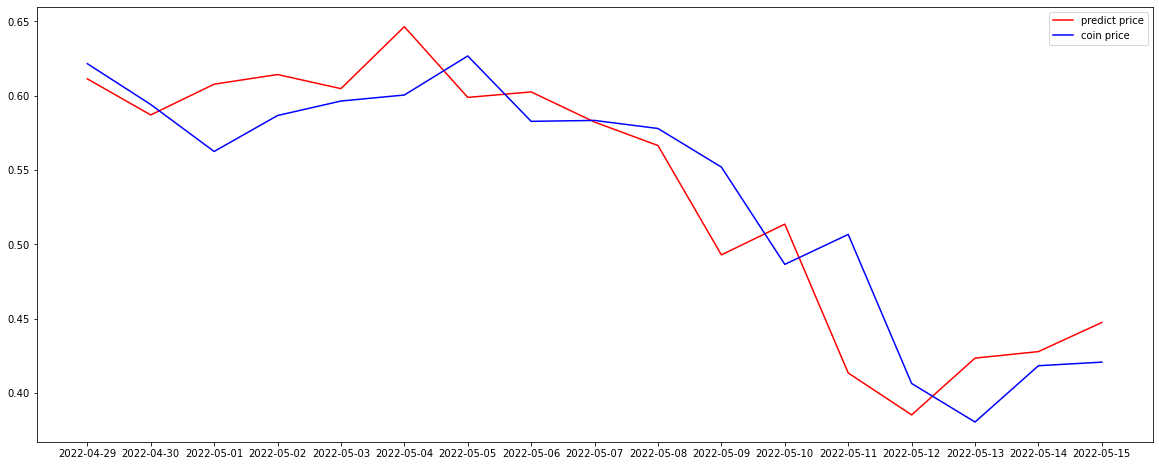

In [13]:
gfmodel.visualize()

In [14]:
result.to_csv('XRP_result_data')
gfmodel.save_csv('XRP_Visulize_data.csv')